<a href="https://colab.research.google.com/github/liuhuiaren0524/GoogleColab-Github/blob/main/grab_cut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
import sys
from google.colab import drive
drive.mount('/content/drive')
sys.path.append('/content/drive/My Drive/Colab Notebooks')
sys.path.append('/content/drive/My Drive/app/BERT')

TensorFlow 1.x selected.
1.15.2
Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

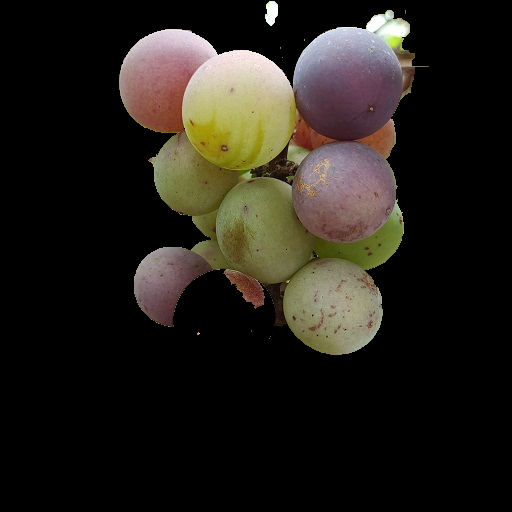

In [10]:
def grab_cut(sourceDir):
	# 读取图片
	img = cv2.imread(sourceDir)
	# 图片宽度
	img_x = img.shape[1]
	# 图片高度
	img_y = img.shape[0]
	# 分割的矩形区域
	rect = (96,1, 359, 358)
	# 背景模式,必须为1行,13x5列
	bgModel = np.zeros((1, 65), np.float64)
	# 前景模式,必须为1行,13x5列
	fgModel = np.zeros((1, 65), np.float64)
	# 图像掩模,取值有0,1,2,3
	mask = np.zeros(img.shape[:2], np.uint8)
	# grabCut处理,GC_INIT_WITH_RECT模式
	cv2.grabCut(img, mask, rect, bgModel, fgModel, 4, cv2.GC_INIT_WITH_RECT)
	# grabCut处理,GC_INIT_WITH_MASK模式
	#cv2.grabCut(img, mask, rect, bgModel, fgModel, 4, cv2.GC_INIT_WITH_MASK)
	# 将背景0,2设成0,其余设成1
	mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
	# 重新计算图像着色,对应元素相乘
	img = img*mask2[:, :, np.newaxis]
	cv2_imshow(img)
	cv2.waitKey(0)
sourceDir = "/content/drive/My Drive/app/Putao/GLCM/Src_pictures/putao.jpg"
grab_cut(sourceDir)

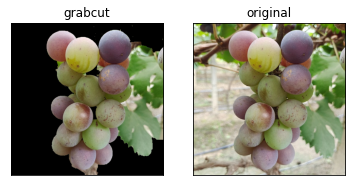

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/drive/My Drive/app/Putao/GLCM/Src_pictures/putao.jpg')
OLD_IMG = img.copy()
mask = np.zeros(img.shape[:2], np.uint8)
SIZE = (1, 65)
bgdModle = np.zeros(SIZE, np.float64)
fgdModle = np.zeros(SIZE, np.float64)
rect = (1, 1, img.shape[1], img.shape[0])
cv2.grabCut(img, mask, rect, bgdModle, fgdModle, 4, cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img *= mask2[:, :, np.newaxis]

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(OLD_IMG, cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])

plt.show()